<a href="https://colab.research.google.com/github/Sreejith-CG/Machine-Learning/blob/main/Marketting_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Marketing_Data.csv")
df

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [ ]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df.isna().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [ ]:
x=df.iloc[:,:-1]
x

,youtube,facebook,newspaper
0,84.72,19.20,48.96
1,351.48,33.96,51.84
2,135.48,20.88,46.32
3,116.64,1.80,36.00
4,318.72,24.00,0.36
...,...,...,...
166,45.84,4.44,16.56
167,113.04,5.88,9.72
168,212.40,11.16,7.68
169,340.32,50.40,79.44


In [ ]:
y=df.iloc[:,-1]
y

0      12.60
1      25.68
2      14.28
3      11.52
4      20.88
       ...  
166     9.12
167    11.64
168    15.36
169    30.60
170    16.08
Name: sales, Length: 171, dtype: float64

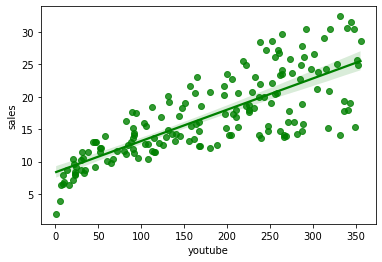

In [ ]:
from pandas.core.algorithms import SelectNSeries
#youtube vs Sales
import seaborn as sns
sns.regplot(x=df['youtube'],y=y,color='g')

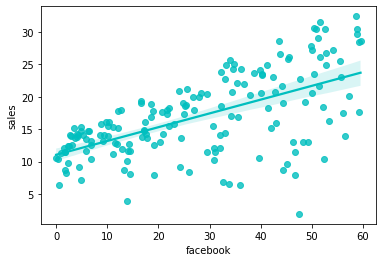

In [ ]:
#youtube vs Sales
import seaborn as sns
sns.regplot(x=df['facebook'],y=y,color='c')

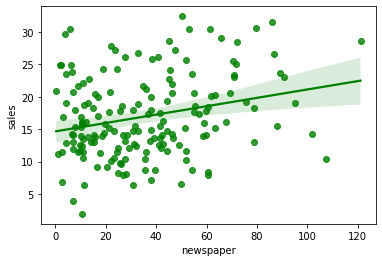

In [ ]:
#youtube vs Sales
import seaborn as sns
sns.regplot(x=df['newspaper'],y=y,color='g')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train


,youtube,facebook,newspaper
143,23.52,24.12,20.40
12,212.40,40.08,46.44
93,268.80,2.88,18.72
91,169.56,32.16,55.44
28,163.44,23.04,19.92
...,...,...,...
133,226.08,21.72,30.72
137,21.48,45.12,25.92
72,355.68,43.56,121.08
140,341.16,12.72,7.68


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
print(model.predict([[84.72,19.20,48.96]]))

[ 9.74081659 23.0820403  19.58293042 28.96833508 12.31498604 14.90906567
 25.13199017 16.62758651 26.38830915 13.71334666 19.59007922 22.20883218
 18.02079247 12.79748549 12.19179001 18.35485702 23.75989274 20.39354179
 17.83301934  6.9002049  13.74790524 24.02604194  8.50883339 20.90910494
 25.23026664 19.42086108  5.40821653 26.28559473 18.16396338 14.67113006
 18.50670058 29.1764028  11.58003292  8.91915544 17.97165446 19.15828793
  7.80497641 19.57640589 23.31770981 16.46041213 17.46677716 14.51531565
 13.05947735 22.48301638 18.47263668 11.89265396  5.50888686 19.98680702
 25.85666393 19.06805881 19.41760703  6.30619952]
[11.15099138]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("slope is",model.coef_)
print("intercept is",model.intercept_)

slope is [0.04473136 0.189319   0.0065438 ]
intercept is 3.406041103272406


In [ ]:
list(zip(x,model.coef_))

[('youtube', 0.044731360575493144),
 ('facebook', 0.18931900273967028),
 ('newspaper', 0.006543802187946757)]

In [ ]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y_test,y_pred)
error

1.4575575585717855

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
perror=mean_absolute_percentage_error(y_test,y_pred)
perror

0.11267652914086944

In [ ]:
from sklearn.metrics import mean_squared_error
serror=mean_squared_error(y_test,y_pred)
serror

3.1704777165210087

In [ ]:
sqr=np.sqrt(serror)
sqr

1.7805835325872832